In [1]:
import pandas as pd

# load train data
df = pd.read_csv('train.csv')
df.shape

(76020, 371)

In [2]:
# split the data as the train set so large
from sklearn.cross_validation import train_test_split

train, test = train_test_split(df, train_size=66020, test_size=10000)

In [32]:
# using PCA to reduce dimensionality of the data set
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
new_features_for_train_set = pca.fit_transform(train.values)

# TODO: print principal components and try to understand the relationship between with more visualizations
# TODO: figure out how to find the optimal k (number of principal components and understand the relationships between them)
# https://www.kaggle.com/vykhand/santander-customer-satisfaction/pca-and-k-means

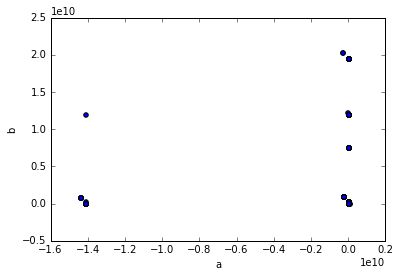

In [40]:
# matplotlib magic
%matplotlib inline

# some basic visualizations
visual_df = pd.DataFrame(new_features_for_train_set, columns=['a', 'b'])
visual_df.plot(kind='scatter', x='a', y='b')

In [3]:
# remove the Y_values
Y_values = train.TARGET
train.drop('TARGET', axis=1, inplace=True)

# because we split test from the train
Original_Y_for_test = test.TARGET
test.drop('TARGET', axis=1, inplace=True)

# basic logistic reqression
from sklearn.linear_model import LogisticRegression

logistic_regression = LogisticRegression()
logistic_regression.fit(train, Y_values)

predictions = logistic_regression.predict(test)
print(predictions)

/Applications/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Applications/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


[0 0 0 ..., 0 0 0]


In [4]:
# confusion matrix
from sklearn import metrics
print(metrics.confusion_matrix(Original_Y_for_test, predictions))

[[9624    0]
 [ 376    0]]


In [5]:
# total number of ones in the response variable
test_df = Original_Y_for_test.to_frame()
test_df[test_df['TARGET'] == 1].count()

# the model above is baised

TARGET    376
dtype: int64

In [6]:
# prediction score
from sklearn import metrics

class_probabilities = logistic_regression.predict_proba(test)

print(metrics.accuracy_score(Original_Y_for_test, predictions))
print(metrics.roc_auc_score(Original_Y_for_test, class_probabilities[:, 1]))

0.9624
0.591040406519


In [7]:
from sklearn.grid_search import GridSearchCV
from sklearn.linear_model import LogisticRegressionCV

# cross validation with grid search
parameters = {'penalty': ['l1', 'l2'], 'cv': [3,5],'Cs':[[1e10],[1e5],[1e2],[1],[1e-2]]}

logistic_regression = GridSearchCV(LogisticRegressionCV(solver='liblinear',random_state=1), 
                                parameters, n_jobs=4, scoring='roc_auc',refit=True)

logistic_regression.fit(train, Y_values)
#print (logistic.best_score_, logistic.best_params_)

GridSearchCV(cv=None, error_score='raise',
       estimator=LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=1,
           refit=True, scoring=None, solver='liblinear', tol=0.0001,
           verbose=0),
       fit_params={}, iid=True, n_jobs=4,
       param_grid={'penalty': ['l1', 'l2'], 'Cs': [[10000000000.0], [100000.0], [100.0], [1], [0.01]], 'cv': [3, 5]},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=0)

In [13]:
best_model = logistic_regression.best_estimator_

LogisticRegressionCV(Cs=[1], class_weight=None, cv=3, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l1', random_state=1,
           refit=True, scoring=None, solver='liblinear', tol=0.0001,
           verbose=0)